In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
#import Restaurant Reviews Dataset
df = pd.read_csv("Restaurant_Reviews.tsv", sep='\t')

In [110]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


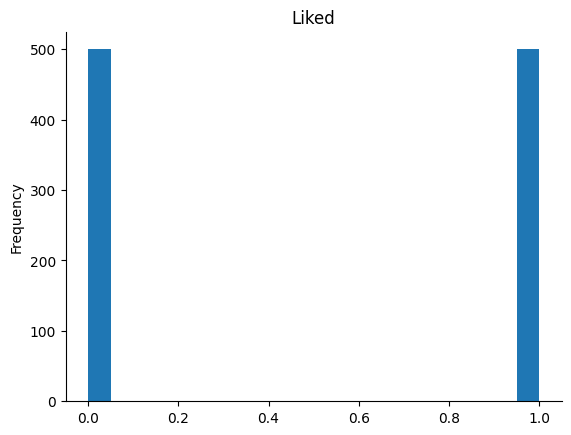

In [111]:
from matplotlib import pyplot as plt
df['Liked'].plot(kind='hist', bins=20, title='Liked')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [112]:
from textblob import TextBlob
df['Sentiment_Intensity'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [113]:
print(df.head())

                                              Review  Liked  \
0                           Wow... Loved this place.      1   
1                                 Crust is not good.      0   
2          Not tasty and the texture was just nasty.      0   
3  Stopped by during the late May bank holiday of...      1   
4  The selection on the menu was great and so wer...      1   

   Sentiment_Intensity  
0                 0.40  
1                -0.35  
2                -1.00  
3                 0.20  
4                 0.80  


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Review               1000 non-null   object 
 1   Liked                1000 non-null   int64  
 2   Sentiment_Intensity  1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [115]:
df.describe()


,Liked,Sentiment_Intensity
count,1000.00000,1000.000000
mean,0.50000,0.154260
std,0.50025,0.464239
min,0.00000,-1.000000
25%,0.00000,-0.003125
50%,0.50000,0.054167
75%,1.00000,0.500000
max,1.00000,1.000000


In [116]:
df['Liked'].nunique()

2

In [117]:
print(df['Liked'].unique())

[1 0]


In [118]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [119]:
df.head()

,Review,Liked,Sentiment_Intensity
0,Wow... Loved this place.,1,0.40
1,Crust is not good.,0,-0.35
2,Not tasty and the texture was just nasty.,0,-1.00
3,Stopped by during the late May bank holiday of...,1,0.20
4,The selection on the menu was great and so wer...,1,0.80


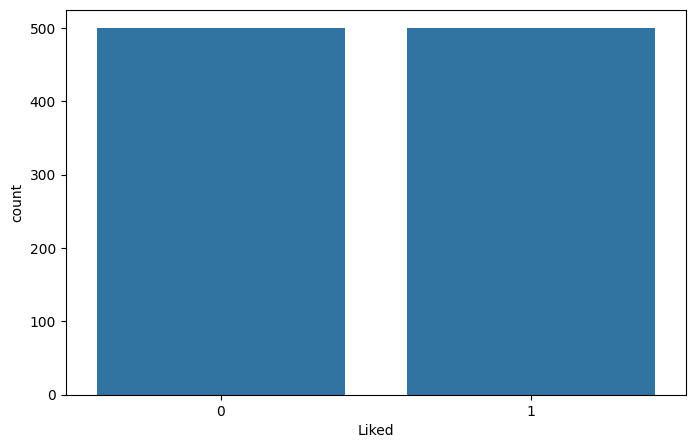

In [120]:
plt.figure(figsize=(8,5))
sns.countplot(x=df.Liked);

In [121]:
x=df['Review'].values
y=df['Liked'].values

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [123]:
x_train.shape

(750,)

In [124]:
x_test.shape

(250,)

In [125]:
y_train.shape

(750,)

In [126]:
y_test.shape

(250,)

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')

In [128]:
x_train_vect=vect.fit_transform(x_train)
x_test_vect=vect.transform(x_test)

In [129]:
from sklearn.svm import SVC
model=SVC()

In [130]:
model.fit(x_train_vect,y_train)

SVC()

In [131]:
y_pred=model.predict(x_test_vect)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.72

In [133]:
from sklearn.pipeline import make_pipeline
text_model=make_pipeline(CountVectorizer(),SVC())

In [134]:
text_model.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [135]:
y_pred=text_model.predict(x_test)

In [136]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0])

In [137]:
accuracy_score(y_pred,y_test)

0.792

In [138]:
import joblib
joblib.dump(text_model,'Restaurant')

['Restaurant']

In [139]:
pip install gradio

In [140]:
!pip install gradio --upgrade

  Using cached gradio-4.21.0-py3-none-any.whl (17.0 MB)
  Attempting uninstall: gradio
    Found existing installation: gradio 3.14.0
    Uninstalling gradio-3.14.0:
      Successfully uninstalled gradio-3.14.0


In [141]:
!pip install -q gradio==3.14.0


In [142]:
import gradio as gr
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import joblib

# Load the Restaurant Reviews Dataset
df = pd.read_csv("Restaurant_Reviews.tsv", sep='\t')

# Prepare data for training
x = df['Review'].values
y = df['Liked'].values

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Initialize CountVectorizer
vect = CountVectorizer(stop_words='english')

# Transform text data into vectors
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

# Initialize and train the Support Vector Classifier
model = SVC()
model.fit(x_train_vect, y_train)

# Define a function to predict sentiment
def predict_sentiment(review):
    # Transform the input text into a vector
    review_vect = vect.transform([review])
    # Predict sentiment (binary classification)
    prediction = model.decision_function(review_vect)[0]
    # Convert binary prediction to text output
    if prediction > 0:
        sentiment = "positive"
    else:
        sentiment = "negative"
    # Calculate sentiment intensity
    intensity = abs(prediction)
    return sentiment, intensity

# Define the Gradio interface
inputs = gr.inputs.Textbox(lines=3, label="Enter your restaurant review")
outputs = [gr.outputs.Textbox(label="Sentiment"), gr.outputs.Textbox(label="Sentiment Intensity")]
app = gr.Interface(fn=predict_sentiment, inputs=inputs, outputs=outputs, title="Restaurant Sentiment Analysis")

# Launch the interface
app.launch(share=True)


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:26: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:21: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://c56d68b8-4c2c-4fb1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
